In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('darkgrid')

# Acquisitions Dataset

In [2]:
df = pd.read_csv('acquisitions_update_2021.csv')
df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM


# Data Cleaning

In [3]:
df = df.replace("-", np.nan)


In [4]:
# Converting columns into numerical values
df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'], errors='coerce')
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')

# Rename the column, per a billion
df = df.rename({'Acquisition Price': 'Acquisition Price(Billions)'}, axis=1)


### Previously, we looked at the companies with the highest number of acquisitions:

In [5]:
companies = df['Parent Company'].value_counts()
companies_df = companies.to_frame().reset_index()
companies_df = companies_df.rename({'index': 'Parent Company', 'Parent Company': 'Acquisitions'}, axis=1)

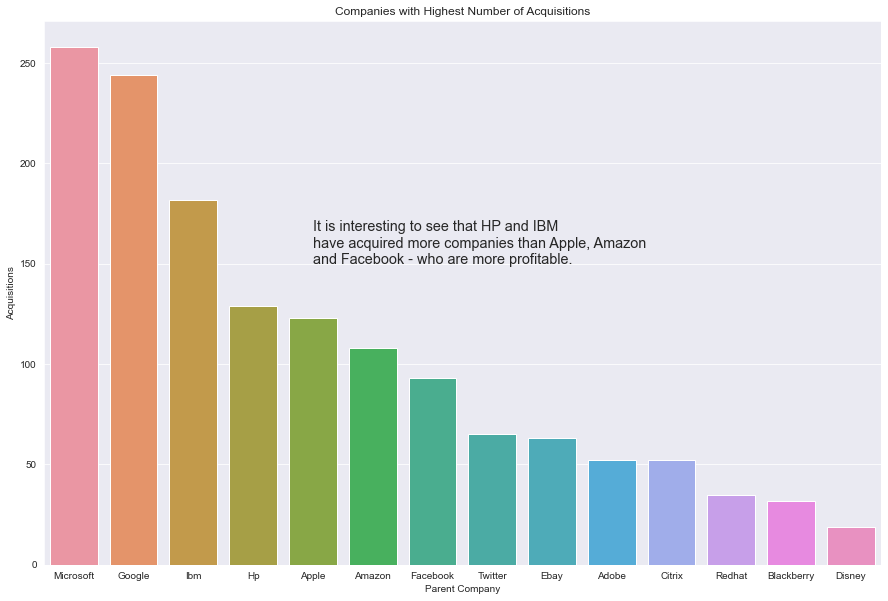

In [6]:
text = ('It is interesting to see that HP and IBM' + '\n' + 'have acquired more companies than Apple, Amazon' + 
        '\n' + 'and Facebook - who are more profitable.')

plt.figure(figsize=(15,10))
plt.title('Companies with Highest Number of Acquisitions')
sns.barplot(x='Parent Company', y='Acquisitions', data=companies_df)
plt.text(x=4, y=150, s=text, size='x-large');

##### Observation:
It is seems that companies who have a stronger focus on computer software have a higher number of acquisitions. Perhaps this is because companies that specialize in computer software generate more revenue that supports these acquisitions.

# Analysis(Part 2):

This notebook is Part 2 to an initial exploratory analysis performed on the acquisitions by tech companies. You can view it here: [Acquisitions by Tech Companies(E.D.A)](https://www.kaggle.com/molomunyansanga/acquisitions-by-tech-companies-e-d-a)

We are now going to compare the parent companies in order to further understand the dataset provided.

#### Let us now compare the information above with the rate of acquisition for each parent company

# What is the rate of acquisition of each parent company?

In [7]:
rate_year = df.groupby(['Parent Company', 'Acquisition Year']).count()
rate_year = rate_year.reset_index()
# rate[0:26]
rate_year = rate_year.groupby(['Parent Company']).count()
rate = df.groupby(['Parent Company']).count()
tot_rate = pd.DataFrame({'years':rate_year['Acquisition Year'], 'acquired companies':rate['Acquired Company']})
acquisition_rate = tot_rate['acquired companies']/tot_rate['years']
tot_rate['acquisition rate'] = acquisition_rate

tot_rate = tot_rate.sort_values(by='acquisition rate', ascending=False)

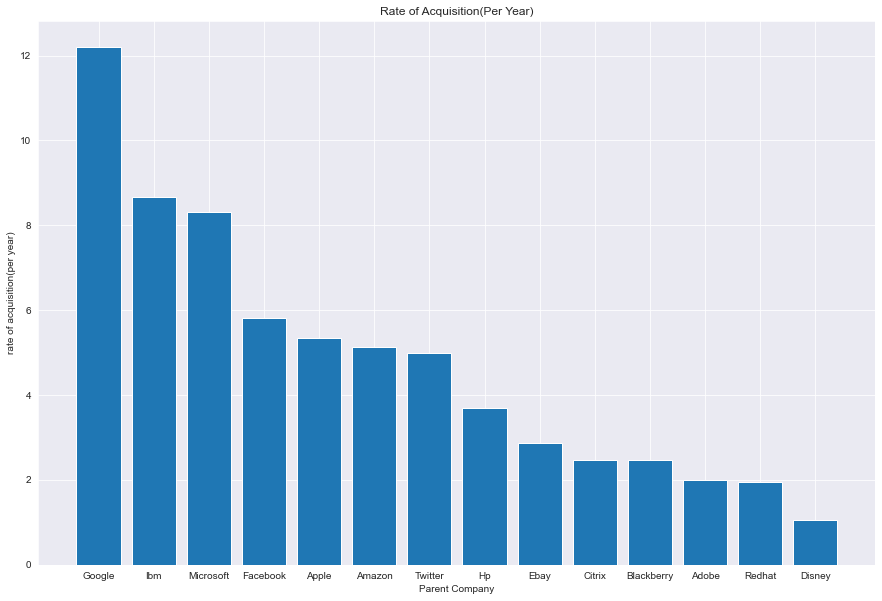

In [8]:
plt.figure(figsize=(15,10))
plt.bar(x=tot_rate.index, height='acquisition rate', data=tot_rate)
plt.title('Rate of Acquisition(Per Year)')
plt.xlabel('Parent Company')
plt.ylabel('rate of acquisition(per year)');

###### Observation
It appears that Google has the highest rate of acquisitions per year. Interestingly, HP which had the 4th highest number of acquisitions is now at the 50th percentile in terms of rate of acquisitions per year.

# Which products  were derived by a high number of company acquisitions?

In [9]:
product = df['Derived Products'].value_counts()
product_df = product.to_frame().reset_index()
product_df = product_df.rename({'index': 'derived product', 'Derived Products': 'Total'}, axis=1)

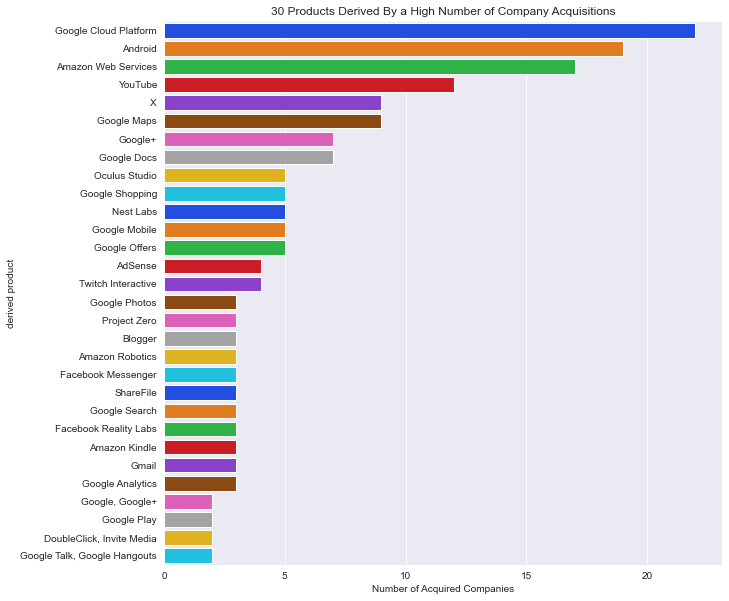

In [10]:
plt.figure(figsize=(10,10))
plt.title('30 Products Derived By a High Number of Company Acquisitions')
sns.barplot(y='derived product', x='Total', data=product_df[:30], palette='bright')
plt.xlabel('Number of Acquired Companies');

###### Observation
It seems that Google products were derived from the highest number of acquired companies. This is representative of the earlier information - that Google tends to acquire alot of companies.

# What is the average spend of each parent company during its acquisitions?

In [11]:
average_spend = df.groupby(['Parent Company']).mean()
average_spend.drop(['ID', 'Acquisition Year'], axis=1, inplace=True)
average_spend.sort_values(by='Acquisition Price(Billions)', ascending=False)

,Acquisition Price(Billions)
Parent Company,
Disney,8.137547e+09
Twitter,3.695226e+09
Hp,2.236599e+09
Ibm,1.849158e+09
Microsoft,1.660034e+09
Adobe,1.191624e+09
Facebook,9.332577e+08
Amazon,8.416872e+08
Ebay,4.493438e+08


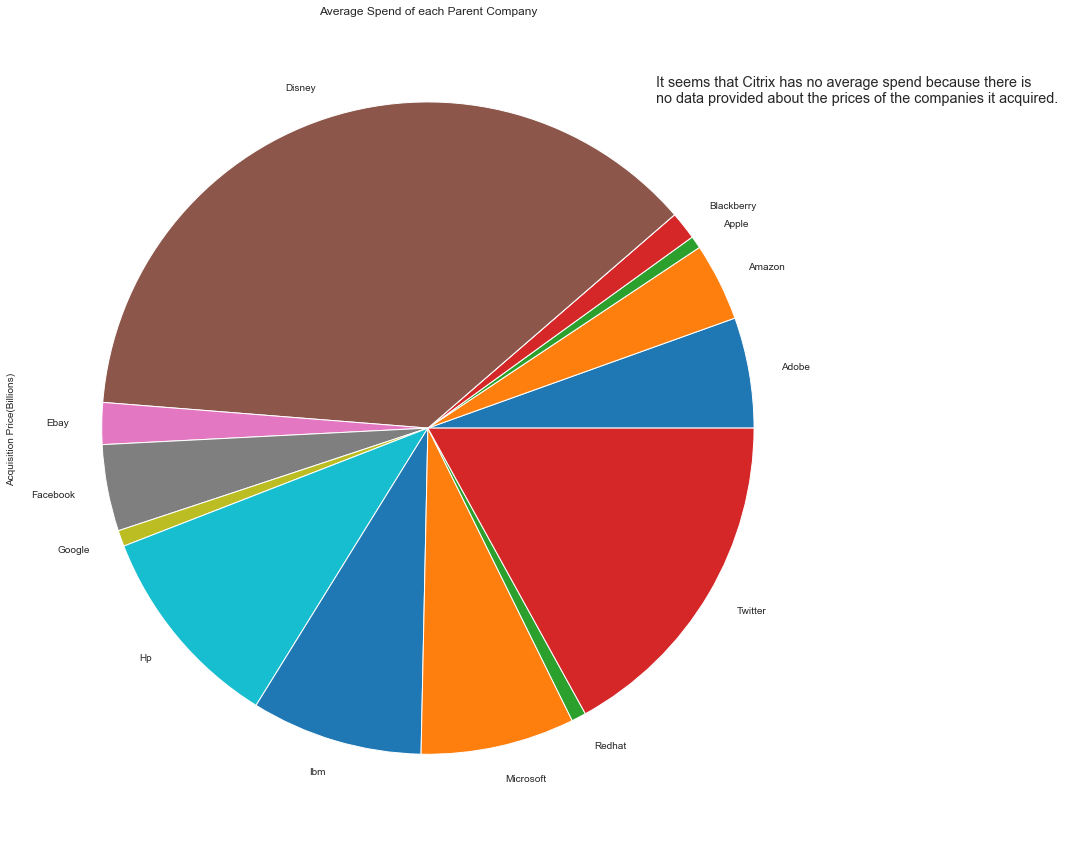

In [12]:
text = ('It seems that Citrix has no average spend because there is' + 
        '\n' + 'no data provided about the prices of the companies it acquired.')

average_spend.plot.pie(y='Acquisition Price(Billions)', figsize=(15, 15), ylabel='Acquisition Price(Billions)',
                      title='Average Spend of each Parent Company', legend='')
plt.text(x=0.7, y=1, s=text, size='x-large');


###### Observations:
It is interesting to see that Disney which had the lowest number of acquisitions, has the highest average spending of all the tech companies. Disney spends more money on average than other tech companies like Apple and Amazon - who are more profitable.

It also appears like the top 2 parent companies with the highest number of acquisitions (Microsoft and Google), have a lower average spending than some other companies.


# Which parent company has spent the most money on a single acquisition?

In [13]:
high = df
high = high.drop(['ID', 'Acquisition Month','Business', 'Country',
           'Category', 'Derived Products', 'Acquisition Year', 'Acquired Company'], axis=1)

highest_spend = high.groupby(['Parent Company']).max()
highest_spend = highest_spend.sort_values(by='Acquisition Price(Billions)', ascending=False)
highest_spend

,Acquisition Price(Billions)
Parent Company,
Disney,7.130000e+10
Twitter,5.010000e+10
Ibm,3.400000e+10
Microsoft,2.620000e+10
Hp,2.500000e+10
Facebook,1.900000e+10
Amazon,1.370000e+10
Adobe,4.750000e+09
Ebay,2.600000e+09


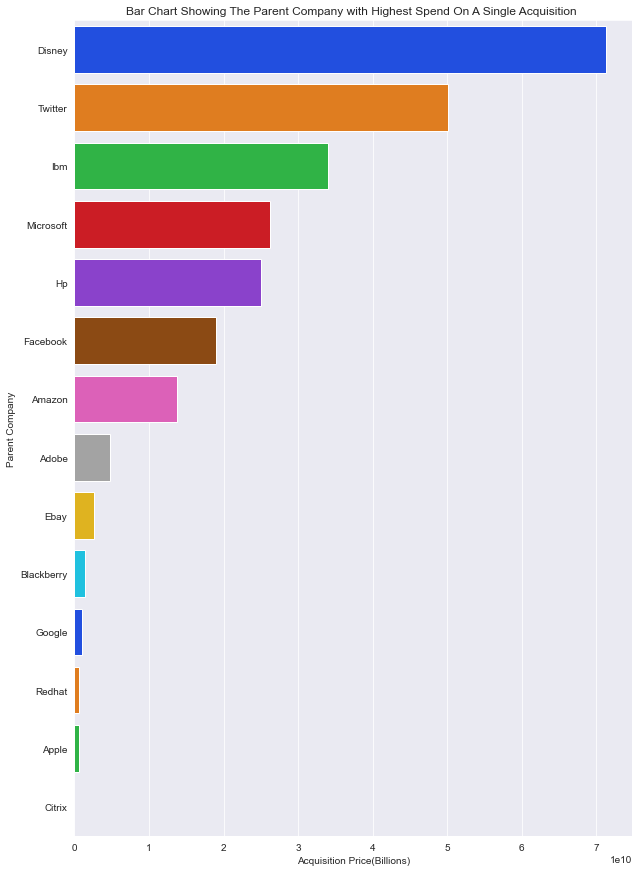

In [14]:
plt.figure(figsize=(10,15))
plt.title('Bar Chart Showing The Parent Company with Highest Spend On A Single Acquisition ')
sns.barplot(y=highest_spend.index, x='Acquisition Price(Billions)', data=highest_spend, palette='bright');

###### Observation:
It appears that Disney is the company with the highest spend on a single acquisition. Let us get more information on that:

In [15]:
df[df['Acquisition Price(Billions)'] == 7.130000e+10]

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price(Billions),Category,Derived Products
1402,1403,Disney,2019.0,Mar,21st Century Fox,NaN,NaN,7.130000e+10,NaN,NaN


This information is representative of Disney's successful decision making in 2019. Disney broke its own annual global box-office record in 2019, including a record number of $1 billion releases.

# Which months had the highest number of acquisitions?

In [16]:
month = df['Acquisition Month'].value_counts()
month_df = month.to_frame().reset_index()
month_df = month_df.rename({'index': 'months', 'Acquisition Month': 'Total'}, axis=1)
month_df = month_df.set_index('months')
month_df
month_df.index = pd.CategoricalIndex(month_df.index, categories=['Jan', 'Feb', 'Mar', 'Apr','May',
                                          'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
month_df = month_df.sort_index()

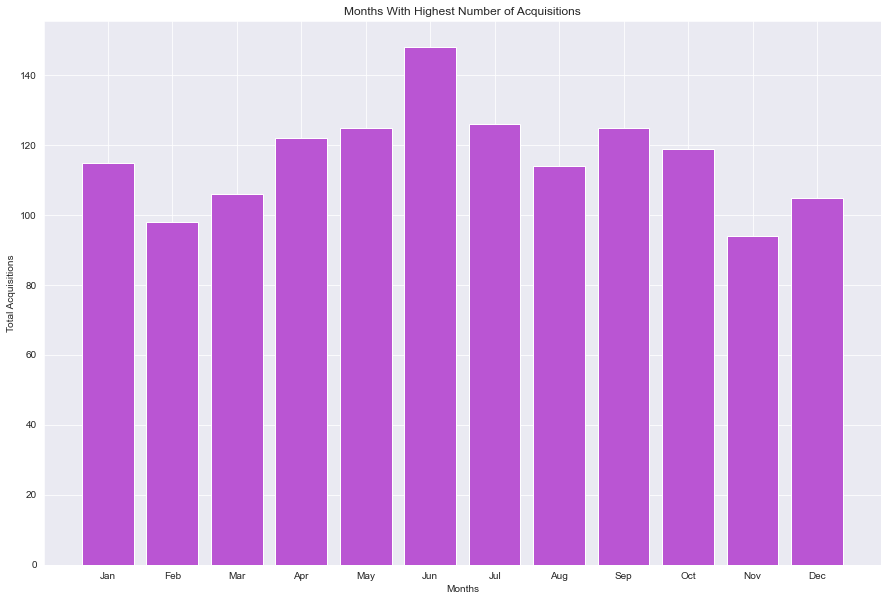

In [17]:
plt.figure(figsize=(15,10))
plt.bar(x=month_df.index, height='Total', data=month_df, color='mediumorchid')
plt.title('Months With Highest Number of Acquisitions')
plt.xlabel('Months')
plt.ylabel('Total Acquisitions');

###### Observation
It appears that the highest number of acquisitions took place during the summer months. Traditionally, businesses have tended to slow down during the summer months. Perhaps these tech companies decided to bargain during the months when sales were low for the acquired companies.